# HOMEWORK 2 ADM
#### Samin Hamidi, Egon Ferri, Davide Manfredini

In [411]:
import pandas as pd
import numpy as np
from datetime import datetime
import time

import matplotlib.pyplot as plt
import seaborn as sns
from sys import getsizeof as get

## PRELIMINARY ANALYSIS
###### We load our data file and we took a glance at it

In [412]:
M1 = pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\yellow_tripdata_2018-01.csv", encoding = 'latin-1')
#M1 = pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\yellow_tripdata_2018-02.csv", encoding = 'latin-1')
#M1 = pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\yellow_tripdata_2018-03.csv", encoding = 'latin-1')
#M1 = pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\yellow_tripdata_2018-04.csv", encoding = 'latin-1')
#M1 = pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\yellow_tripdata_2018-05.csv", encoding = 'latin-1')
#M1 = pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\yellow_tripdata_2018-06.csv", encoding = 'latin-1')

Size, shape, and basic charateristics of our data frame:

In [413]:
get(M1)

2855719028

In [414]:
print(M1.shape)

(8759874, 17)


In [415]:
M1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,1,N,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.7,1,N,239,140,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.8,1,N,262,141,1,6.0,0.5,0.5,1.00,0.0,0.3,8.30
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.2,1,N,140,257,2,33.5,0.5,0.5,0.00,0.0,0.3,34.80
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.5,1,N,246,239,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55


In [416]:
M1.describe()


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06
mean,1.560940e+00,1.606855e+00,2.804001e+00,1.039545e+00,1.644585e+02,1.627269e+02,1.310611e+00,1.224434e+01,3.246822e-01,4.975067e-01,1.818745e+00,3.026133e-01,2.996306e-01,1.549098e+01
std,4.962724e-01,1.258464e+00,6.412346e+01,4.450700e-01,6.636021e+01,7.031164e+01,4.817818e-01,1.168321e+01,4.502524e-01,4.333319e-02,2.486341e+00,1.738185e+00,1.442815e-02,1.419540e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.500000e+02,-4.469000e+01,-5.000000e-01,-8.880000e+01,-1.500000e+01,-3.000000e-01,-4.503000e+02
25%,1.000000e+00,1.000000e+00,9.100000e-01,1.000000e+00,1.160000e+02,1.130000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.300000e+00
50%,2.000000e+00,1.000000e+00,1.550000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,0.000000e+00,5.000000e-01,1.360000e+00,0.000000e+00,3.000000e-01,1.130000e+01
75%,2.000000e+00,2.000000e+00,2.840000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.350000e+01,5.000000e-01,5.000000e-01,2.350000e+00,0.000000e+00,3.000000e-01,1.662000e+01
max,2.000000e+00,9.000000e+00,1.894838e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,8.016000e+03,6.000000e+01,4.549000e+01,4.417100e+02,9.507000e+02,1.000000e+00,8.016800e+03


In [417]:
M1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759874 entries, 0 to 8759873
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 1.1+ GB


We check if are there any NaN values in the month of January.


In [418]:

#is there any NaN (not a number) values in the dataframe?
#Returns a dataframe of boolean values (true/false)
#M1.isnull()

#If we want to find only those columns which have NaN values
print(M1.isnull().any())

#one more any() will tell us if any of the above is true?
print(M1.isnull().any().any())


VendorID                 False
tpep_pickup_datetime     False
tpep_dropoff_datetime    False
passenger_count          False
trip_distance            False
RatecodeID               False
store_and_fwd_flag       False
PULocationID             False
DOLocationID             False
payment_type             False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
dtype: bool
False


In [419]:
#another way to see if our dataframe has any NaN vales
M1.isnull().values.any()


False

So we see that we have not NaN values. Looking at the dataframe we see that some cells have 0 value. We will see how to manage them.

## RQ1
##### In what period of the year Taxis are used more? Create a plot that, for each month, shows the average number of trips recorded each day. Due to the differences among New York zones, we want to visualize the same information for each boroughs. Do you notice any difference among them? Provide comments and plausible explanations about what you observe (e.g.: what is the month with the highest daily average?).

The pickup boroughs are taken into consideration.
To answer this question, we need two columns. So, we drop the others. 
We keep tpep_pickup_datetime, PULocationID.

In [420]:

#dropping vs keeping the ones I need?
#df.drop(columns=['', 'C'])
M2 = M1.filter(['tpep_pickup_datetime', 'PULocationID'])
#free the memory from this big object M1 is! 
del M1


In [421]:
M2.head(2)

,tpep_pickup_datetime,PULocationID
0,2018-01-01 00:21:05,41
1,2018-01-01 00:44:55,239


In [422]:
M2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759874 entries, 0 to 8759873
Data columns (total 2 columns):
tpep_pickup_datetime    object
PULocationID            int64
dtypes: int64(1), object(1)
memory usage: 133.7+ MB


We have two datetime objects. Let's convert them into usable data columns:  day, hour, minutes,..

In [423]:
M2['pickup_day'] = pd.DatetimeIndex(M2['tpep_pickup_datetime']).day


In [424]:
M2.head()

,tpep_pickup_datetime,PULocationID,pickup_day
0,2018-01-01 00:21:05,41,1
1,2018-01-01 00:44:55,239,1
2,2018-01-01 00:08:26,262,1
3,2018-01-01 00:20:22,140,1
4,2018-01-01 00:09:18,246,1


Drop the columns we don't need anymore.

In [425]:
M3 = M2.drop(columns = ['tpep_pickup_datetime'])

In [426]:
#Free up memory space 
del M2

In [427]:
M3.head()

,PULocationID,pickup_day
0,41,1
1,239,1
2,262,1
3,140,1
4,246,1


Now we want to substitute PULocationID with corrispondent Borough.

In [428]:
#concatenate(join/merge)M3 and taxi_zone_lookup dataframe

#read taxi_zone_lookup
borough = pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\taxi_zone_lookup.csv", encoding = 'latin-1')

In [429]:
borough.head(5)

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


The key column is LocationID in boroughs and (PULocationID or DOLocationID) in M3. They contain the same data: LocationIDs. 

In [430]:
#the key column is LocationID in boroughs and (PULocationID or DOLocationID) in M3. They contain the same data: LocationIDs. 
#How to merge these two dataframes when two columns' keys are not in the same order?

result = pd.merge(M3,
                 borough[['LocationID', 'Borough']],
                 left_on='PULocationID',
                 right_on='LocationID',
                 how='inner' 
                 )
result.head()


,PULocationID,pickup_day,LocationID,Borough
0,41,1,41,Manhattan
1,41,1,41,Manhattan
2,41,1,41,Manhattan
3,41,1,41,Manhattan
4,41,1,41,Manhattan


In [431]:
M4 = result.drop(['LocationID'], 1)
M4.head()

,PULocationID,pickup_day,Borough
0,41,1,Manhattan
1,41,1,Manhattan
2,41,1,Manhattan
3,41,1,Manhattan
4,41,1,Manhattan


In [432]:
del result 

Now, we need to use groupby function. We need the average frequency of taxis used in each day and for each borough seperately. 

First we group by based on our boroughs.


In [433]:
M4.groupby(['Borough']).groups.keys()

dict_keys(['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island', 'Unknown'])

In [434]:
s = M4.groupby('Borough')['pickup_day'].count()


Now we create a list of averages of each borough  and we append to the list the cumulative value of New York City.

In [435]:
borAvgs=[]
for i in range (7):
    borAvgs.append(s[i]//31)
NYAvgs=sum(borAvgs)
borAvgs.append(NYAvgs)

In [436]:
print(borAvgs)
print(NYAvgs)

[238, 3233, 18, 256958, 16996, 4, 5126, 282573]
282573


Now we want to repeat this analysis for each month.
We create a dataframe to store the analisy.

In [437]:
columns=[]
index= ['Bronx','Brooklyn','EWR','Manhattan','queens','Staten Island','Unknow', 'NYC']
df=pd.DataFrame(index=index, columns=columns) 

In [438]:
df

""
Bronx
Brooklyn
EWR
Manhattan
queens
Staten Island
Unknow
NYC


In [439]:
df['January']=borAvgs


In [440]:
df

,January
Bronx,238
Brooklyn,3233
EWR,18
Manhattan,256958
queens,16996
Staten Island,4
Unknow,5126
NYC,282573


Now we want to repeat and store our analysis for each month.

In [441]:
months=[' ','January','February','March','April','May','June']
for i in range(2,7):
    M1= pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\yellow_tripdata_2018-0"+str(i)+".csv", encoding = 'latin-1')
    M2 = M1.filter(['tpep_pickup_datetime', 'PULocationID'])
    del M1
    M2['pickup_day'] = pd.DatetimeIndex(M2['tpep_pickup_datetime']).day
    M3 = M2.drop(columns = ['tpep_pickup_datetime'])
    result = pd.merge(M3,
                 borough[['LocationID', 'Borough']],
                 left_on='PULocationID',
                 right_on='LocationID',
                 how='inner' 
                 )
    M4 = result.drop(['LocationID'], 1)
    M4.groupby(['Borough']).groups.keys()
    s = M4.groupby('Borough')['pickup_day'].count()
    borAvgs=[]
    for j in range (7):
        if months[i] == 'March' or months[i] == 'May':
            borAvgs.append(s[j]//31)
        if months[i] == 'February':
            borAvgs.append(s[j]//28)
        if months[i] == 'April' or months[i] == 'June':
            borAvgs.append(s[j]//30)
    NYAvgs=sum(borAvgs)
    borAvgs.append(NYAvgs)
    df[months[i]]=borAvgs


In [442]:
df

,January,February,March,April,May,June
Bronx,238,234,333,347,350,340
Brooklyn,3233,3396,3965,3969,3961,4098
EWR,18,17,21,23,24,22
Manhattan,256958,277424,276408,280959,269354,262626
queens,16996,17304,18221,19877,19704,19158
Staten Island,4,3,4,4,4,5
Unknow,5126,4907,5251,5001,4150,4209
NYC,282573,303285,304203,310180,297547,290458


We transpose the dataframe to get plot of the keys that we want (boroughs).

In [443]:
df_tra=df.T
df_tra

,Bronx,Brooklyn,EWR,Manhattan,queens,Staten Island,Unknow,NYC
January,238,3233,18,256958,16996,4,5126,282573
February,234,3396,17,277424,17304,3,4907,303285
March,333,3965,21,276408,18221,4,5251,304203
April,347,3969,23,280959,19877,4,5001,310180
May,350,3961,24,269354,19704,4,4150,297547
June,340,4098,22,262626,19158,5,4209,290458


We plot some graphs to get a good visualization of our problem.

Graph of taxis taken in New York in each month:

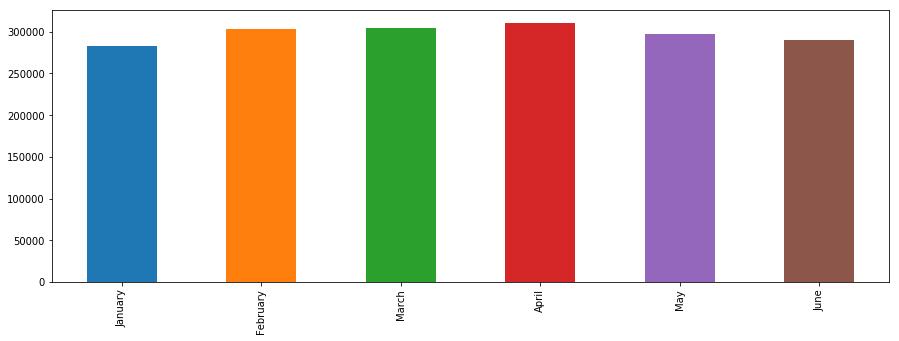

In [450]:
df_tra['NYC'].plot(kind='bar', figsize=(15,5))


Graph of taxis taken in New York in each month in each borough.

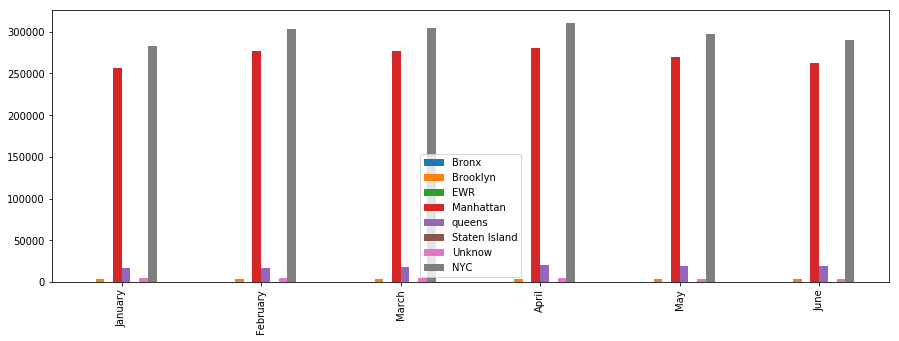

In [449]:
df_tra.plot(kind='bar', figsize=(15,5))

Another one:

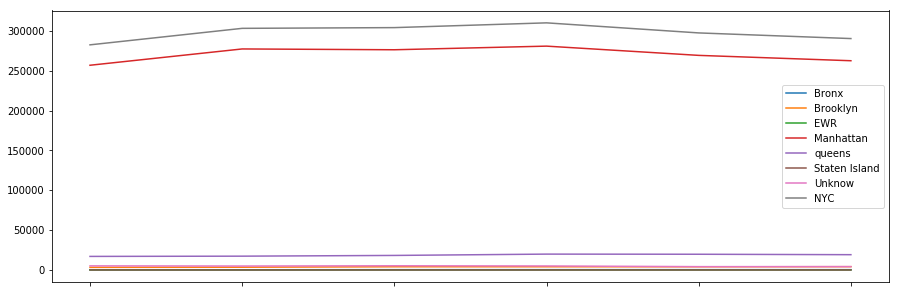

In [446]:
df_tra.plot(kind='line', figsize=(15,5))

Unfortunatly those plots don't give us a very good representation becouse Boroughs are very differents from each other in average number of Taxis, so they don't fit well in a unique graph. However we can describe some minor common patterns.

## OBSERVATIONS
 1.As it's easy to see from our data frame and from our graphs, Manhattan has the highest trafic of taxis in each of six month compared to other boroughs. 
 2.Another thing observable, is that pick ups in January and June are less frequent. April is the month with the highest number of pick ups. 